In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
from symmetry_breaking_JAX.models_2D.run import build_initial_state_2d, run_2d
from symmetry_breaking_JAX.models_2D.geom_utils import make_grid
from symmetry_breaking_JAX.models_2D.helpers_2D import single_run_2D
import numpy as np

In [11]:
T = 3600 * 10
n_save = 50

c_factor = 50
rate_factor = 4
# 1. Define parameters and blips
params0 = {
    "D_N": 1.85 / 4 * rate_factor,
    "D_L": 15*1.85 / 1.5 * rate_factor,
    "sigma_N": 10 / c_factor * rate_factor,
    "sigma_L": 16 / c_factor * rate_factor,
    "mu_N": 0.0001,
    "mu_L": 0.00005,
    "n": 2,
    "p": 2,
    "alpha": 1.0,
    "K_A": 667.0 / c_factor,
    "K_NL": 667 / c_factor / 5 / 8,
    "K_I": 1 / c_factor,
    "Lx": 1250,
    "Ly": 1250,
    "dx": 10,
    "dy": 10,
    "geometry": "rectangle",
    "bc": "periodic",
    "N_positions": jnp.array([[0, 0]]),
    "N_amps": jnp.array([1000 / c_factor]),
    "N_sigmas": jnp.array([25]),
    "L_mode": "constant",
    "L_amp": 0.0
}

grid0 = make_grid(params0)

In [26]:
params0["N_positions"] = jnp.array([[100, 100], [100, -100]]) #, [0,0]])
params0["N_amps"] = jnp.array([2000, 1900])#, 1000]) #/ c_factor 
params0["N_sigmas"] = jnp.array([30, 30]) * 2 #, 30]) * 2

In [27]:
# 1. Define parameters and blips
grid0 = make_grid(params0)

N_t0, L_t0 = single_run_2D(params0, grid0, T)

In [7]:
# x = grid0.X[0, :]
# fig = px.line(x=x, y=N_t0[-1][61, :])
# # fig.update_layout(yaxis=dict(range=[0, np.max(strip)]))
# fig.show()

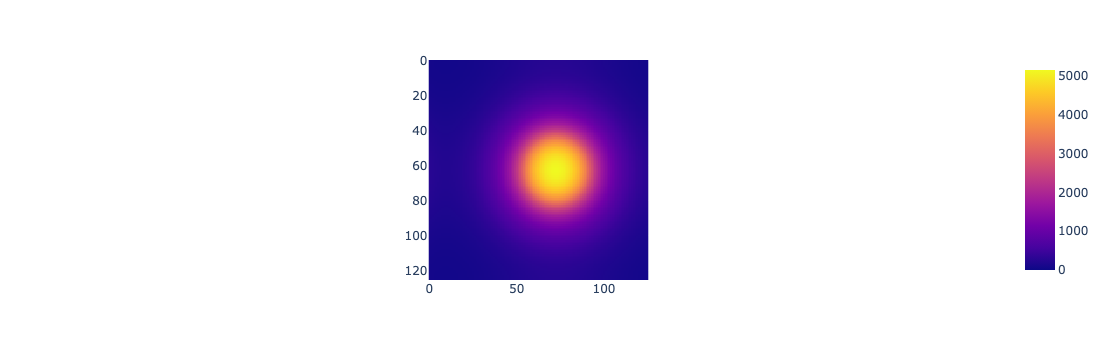

In [28]:
fig = px.imshow(N_t0[-1], range_color=[0, float(np.max(N_t0[-1]))])
fig.show()

# Run the simulation

In [29]:
import matplotlib.pyplot as plt
import time

%matplotlib tk

ts = range(N_t0.shape[0])

fig, ax = plt.subplots(figsize=(6, 5))
vmin = np.percentile(N_t0[-1], .1)
vmax = np.percentile(N_t0[-1], 99.5) * 0.85

for i in range(len(ts)):
    ax.clear()
    ax.imshow(
        N_t0[i],
        cmap="magma",
        origin="lower",
        # extent=[X.min(), X.max(), Y.min(), Y.max()],
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(f"t = {ts[i]:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.pause(0.15)   # force GUI update
    
plt.show()

In [20]:
fig, ax = plt.subplots(figsize=(6, 5))
for i in range(len(ts)):
    ax.clear()
    ax.imshow(
        L_t[i],
        cmap="viridis",
        origin="lower",
        extent=[X.min(), X.max(), Y.min(), Y.max()],
        # vmin=0,
        # vmax=L_t.max(),
    )
    ax.set_title(f"t = {ts[i]:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.pause(0.05)   # force GUI update
    
    plt.show()



In [23]:
jnp.max(N_t)

Array(640.84674, dtype=float32)

In [76]:
params

Params2D(D_N=10, D_L=11.95, sigma_N=10, sigma_L=1e-06, mu_N=0.0001, mu_L=0.0001, n=2, p=2, alpha=1.0, K_A=667.0, K_NL=1000000.0, K_I=1000000.0, apply_to_L=True, geometry='rectangle', Lx=1250.0, Ly=100, dx=10, dy=10.0, bc='periodic', R=500.0, n_theta=128, n_phi=256, tau_impulse=1.0, sigma_t_direct=0.05)